# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

Paso 1: Instalación de dependencias

In [1]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import io

Paso 2: Descargar HTML

In [2]:
url = 'https://juegosdelamesaredonda.com/'
response = requests.get(url)
response.status_code


200

In [3]:
response.content

b' \n\n<!doctype html>\n<html lang="es-ES"  class="default" >\n\n  <head>\n    \n      \n  <meta charset="utf-8">\n\n\n  <meta http-equiv="x-ua-compatible" content="ie=edge">\n\n\n\n  <title>Comprar Juegos de mesa, juegos de cartas, juegos de rol, juegos de importaci\xc3\xb3n y juegos para ni\xc3\xb1os</title>\n  \n      \n    <script id=\'lgcookieslaw_script_gtm\'>\n        window.dataLayer = window.dataLayer || [];\n        function gtag(){\n            dataLayer.push(arguments);\n        }\n\n        gtag(\'consent\', \'default\', {\n            \'ad_storage\': \'denied\',\n            \'ad_user_data\': \'denied\',\n            \'ad_personalization\': \'denied\',\n            \'analytics_storage\': \'denied\',\n            \'personalization_storage\': \'granted\',\n            \'security_storage\': \'granted\'\n        });\n    </script>\n\n  \n    <script id=\'lgcookieslaw_script_ms\'>\n        window.uetq = window.uetq || [];\n\n        window.uetq.push(\'consent\', \'default\', {

Paso 3: Transforma el HTML

In [4]:
soup = BeautifulSoup(response.content)
soup


<!DOCTYPE html>
<html class="default" lang="es-ES">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<title>Comprar Juegos de mesa, juegos de cartas, juegos de rol, juegos de importación y juegos para niños</title>
<script id="lgcookieslaw_script_gtm">
        window.dataLayer = window.dataLayer || [];
        function gtag(){
            dataLayer.push(arguments);
        }

        gtag('consent', 'default', {
            'ad_storage': 'denied',
            'ad_user_data': 'denied',
            'ad_personalization': 'denied',
            'analytics_storage': 'denied',
            'personalization_storage': 'granted',
            'security_storage': 'granted'
        });
    </script>
<script id="lgcookieslaw_script_ms">
        window.uetq = window.uetq || [];

        window.uetq.push('consent', 'default', {
            'ad_storage': 'denied',
        });
    </script>
<meta content="Juegos de la Mesa Redonda. Tienda on-line especializada donde c

In [5]:
products = soup.find_all('div', class_='product-meta')
len(products), products[0] 


(41,
 <div class="product-meta">
 <!-- @file modules\appagebuilder\views\templates\front\products\file_tpl -->
 <h3 class="h3 product-title"><a href="https://juegosdelamesaredonda.com/16594-terraforming-mars-amazonis-y-vastitas-8436578818037.html">Terraforming Mars: Amazonis y Vastitas</a></h3>
 <!-- @file modules\appagebuilder\views\templates\front\products\file_tpl -->
 <div class="product-price-and-shipping">
 <span aria-label="Precio regular" class="regular-price">19,95 €</span>
 <span class="discount-percentage discount-product">-10%</span>
 <span aria-label="Precio" class="price">
                           17,96 €
               </span>
 </div>
 <!-- @file modules\appagebuilder\views\templates\front\products\file_tpl -->
 <div class="leo-list-product-reviews">
 <div class="leo-list-product-reviews-wraper">
 <div class="star_content clearfix">
 <div class="star"></div>
 <div class="star"></div>
 <div class="star"></div>
 <div class="star"></div>
 <div class="star"></div>
 </div>


In [6]:
price_tag = soup.find_all('span', class_='price')
price_tag[0]

<span aria-label="Precio" class="price">
                          17,96 €
              </span>

In [7]:
productsp = soup.find_all('div', class_= 'product-price-and-shipping')
productsp[0]


<div class="product-price-and-shipping">
<span aria-label="Precio regular" class="regular-price">19,95 €</span>
<span class="discount-percentage discount-product">-10%</span>
<span aria-label="Precio" class="price">
                          17,96 €
              </span>
</div>

Paso 4: Procesa el DataFrame

In [8]:
products = soup.find_all('div', class_='product-meta')
len(products), products[0] 
list_products = []
for product in products:
    product_name = product.find_all('h3', class_='h3 product-title')
    price = product.find_all('span', class_='price')
    price_line = price[0].text
    price_clean =  re.findall(r'\d+[.,]?\d*', price_line)
    
    list_products.append({'name': product_name[0].text,
                          'price': price_clean[0]})
list_products 

[{'name': 'Terraforming Mars: Amazonis y Vastitas', 'price': '17,96'},
 {'name': 'Expediciones: una secuela de Scythe - Pack de Mech Metalicos',
  'price': '53,96'},
 {'name': 'Mice and Mystics de ratones y magia: Fabulas de Bosquespeso',
  'price': '71,96'},
 {'name': 'Dobble El Hobbit y El Señor de los Anillos', 'price': '15,25'},
 {'name': 'Dewan (castellano)', 'price': '33,75'},
 {'name': 'Legendary Kingdoms: Corona y Torre', 'price': '36,05'},
 {'name': 'El otro lado de la Colina - Edicion Estandar', 'price': '99,70'},
 {'name': 'Final Girl: North Pole Nightmare (Castellano)', 'price': '26,96'},
 {'name': 'Vida en el Amazonas', 'price': '67,46'},
 {'name': 'Twilight Imperium Cuarta Edicion: El Confin del Trueno',
  'price': '107,96'},
 {'name': 'Pequeños Grandes Reinos', 'price': '23,96'},
 {'name': 'Star Wars: Imperial Assault', 'price': '98,96'},
 {'name': 'Cthulhu: Death May Die (castellano)', 'price': '98,96'},
 {'name': 'La llamada de Cthulhu: Caja de inicio - Edicion Revisad

In [9]:
df = pd.DataFrame(list_products)
df

,name,price
0,Terraforming Mars: Amazonis y Vastitas,"17,96"
1,Expediciones: una secuela de Scythe - Pack de ...,"53,96"
2,Mice and Mystics de ratones y magia: Fabulas d...,"71,96"
3,Dobble El Hobbit y El Señor de los Anillos,"15,25"
4,Dewan (castellano),"33,75"
5,Legendary Kingdoms: Corona y Torre,"36,05"
6,El otro lado de la Colina - Edicion Estandar,"99,70"
7,Final Girl: North Pole Nightmare (Castellano),"26,96"
8,Vida en el Amazonas,"67,46"
9,Twilight Imperium Cuarta Edicion: El Confin de...,"107,96"


Paso 5: Almacena los datos en sqlite

In [10]:
conn = sqlite3.connect('Juegos de Mesa')

In [11]:
df.to_sql("most_played", conn, if_exists="replace", index=False)
cursor = conn.cursor()
cursor

In [12]:
cursor.execute("SELECT COUNT(*) FROM most_played")
print("Rows inserted:", cursor.fetchone()[0])

conn.commit()
conn.close()

Rows inserted: 41


Paso 6: Visualiza los datos

In [13]:
df['price_float'] = df['price'].str.replace(',', '.')
df

,name,price,price_float
0,Terraforming Mars: Amazonis y Vastitas,"17,96",17.96
1,Expediciones: una secuela de Scythe - Pack de ...,"53,96",53.96
2,Mice and Mystics de ratones y magia: Fabulas d...,"71,96",71.96
3,Dobble El Hobbit y El Señor de los Anillos,"15,25",15.25
4,Dewan (castellano),"33,75",33.75
5,Legendary Kingdoms: Corona y Torre,"36,05",36.05
6,El otro lado de la Colina - Edicion Estandar,"99,70",99.70
7,Final Girl: North Pole Nightmare (Castellano),"26,96",26.96
8,Vida en el Amazonas,"67,46",67.46
9,Twilight Imperium Cuarta Edicion: El Confin de...,"107,96",107.96


In [14]:
def wrap_labels_while(text, width=3):
    words = text.split(' ')
    wrapped_lines = []
    i = 0
    while i < len(words):
        palabra = words[i : i + width]
        wrapped_lines.append(' '.join(palabra))
        i += width 
    return '\n'.join(wrapped_lines)
df['wrapped_lines'] = df['name'].apply(wrap_labels_while)
df['wrapped_lines']

0               Terraforming Mars: Amazonis\ny Vastitas
1     Expediciones: una secuela\nde Scythe -\nPack d...
2     Mice and Mystics\nde ratones y\nmagia: Fabulas...
3          Dobble El Hobbit\ny El Señor\nde los Anillos
4                                    Dewan (castellano)
5                   Legendary Kingdoms: Corona\ny Torre
6        El otro lado\nde la Colina\n- Edicion Estandar
7        Final Girl: North\nPole Nightmare (Castellano)
8                                  Vida en el\nAmazonas
9     Twilight Imperium Cuarta\nEdicion: El Confin\n...
10                              Pequeños Grandes Reinos
11                         Star Wars: Imperial\nAssault
12                 Cthulhu: Death May\nDie (castellano)
13    La llamada de\nCthulhu: Caja de\ninicio - Edic...
14            Set a Watch:\nEdicion Deluxe (castellano)
15    Star Wars El\nBorde Exterior: Asuntos\nPendientes
16      Dead by Daylight:\nthe board game\n(castellano)
17    Mythwind: Mini Expansion\nWinds of Magic\n

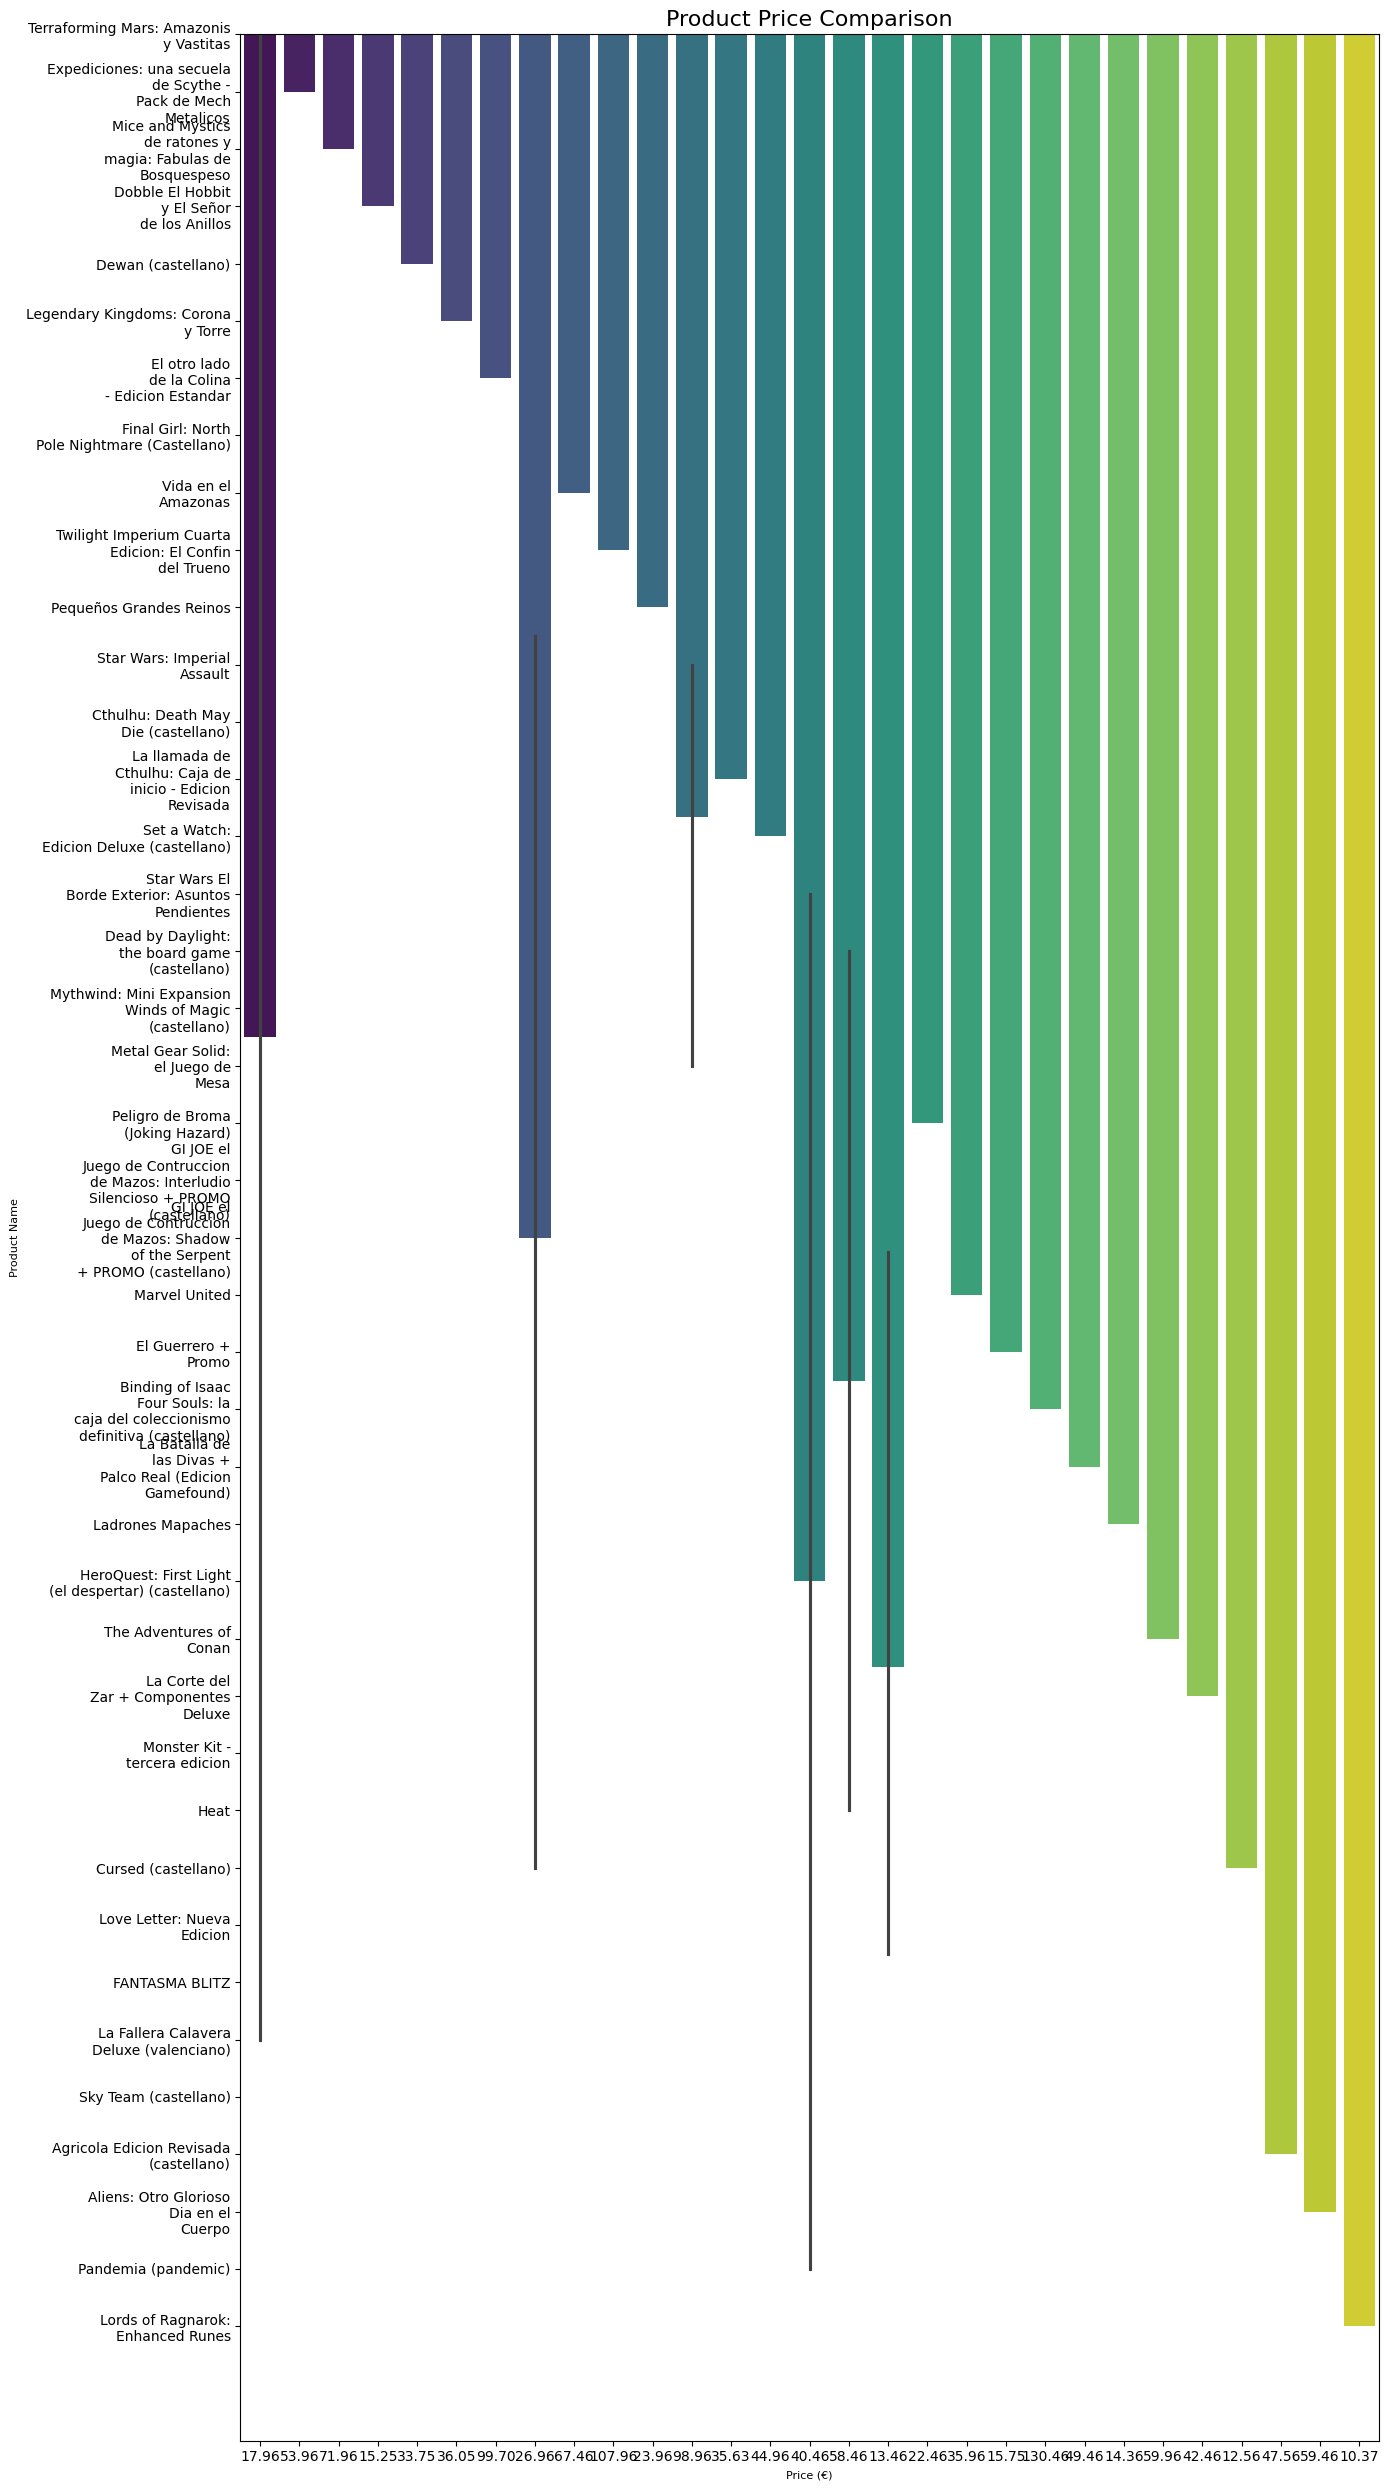

In [32]:
df_sorted = df.sort_values(by='price_float', ascending=False)
plt.figure(figsize=(14, 25))
sns.barplot(x=df['price_float'],
            y=df['wrapped_lines'],
            hue='price_float', legend=False,
            data=df_sorted,
            palette="viridis")


plt.title('Product Price Comparison', fontsize=16)
plt.xlabel('Price (€)', fontsize=8)
plt.ylabel('Product Name', fontsize=8)
plt.tight_layout() 
plt.show()